# Cross Validation

*   To find the well distribution of the data, while training the dataset.
*   **Stratified Cross Validation** — When we split our data into folds, we want to make sure that each fold is a good representative of the whole data. The most basic example is that we want the same proportion of different classes in each fold. Most of the times it happens by just doing it randomly, but sometimes, in complex datasets, we have to enforce a correct distribution for each fold.



In [9]:
# Basic CV

kf = KFold(n_splits = 3)
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

In [10]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

##Rewritting **cross_val_score** in a custom function

In [11]:
folds = StratifiedKFold(n_splits=3)
scores_logistic=[]
for train_index, test_index in folds.split(digits.data, digits.target):
    X_train, X_test, Y_train, Y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear', multi_class='auto'), X_train, X_test, Y_train, Y_test))


In [12]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [13]:
#Using cross_val_score
cs = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
cs

array([0.89482471, 0.95325543, 0.90984975])

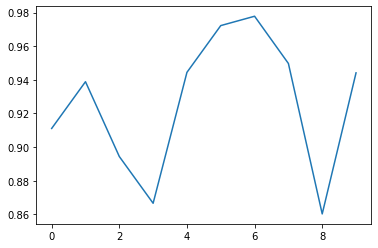

In [7]:
plt.plot(list(x for x in range(0,10)), list(cs))